<a href="https://colab.research.google.com/github/muscak/Istanbul-Rental-Price-Prediction/blob/main/Istanbul_Rentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Istanbul Rent Flat Data
This data collected from Sahibinden that using webscraping on 28 June 2022.

We'll give examples about
- Impementing pipelines
- Hyperparameter tuning using GridSearch
- KFold Crossvalidation
- Removing lines from a datafram using an array

[Kaggle Link](https://www.kaggle.com/datasets/mgunerengineer/istanbul-rent-flat-data)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(style="whitegrid")

# Libraries to connect a data file in the google drive to create the model on Google Colab.
# While working on local computer no need for these libraries. 
from google.colab import files
from google.colab import drive

In [2]:
drive.mount('/content/gdrive') # While working on local computer no need for this function. 

Mounted at /content/gdrive


##Load Raw Data

In [3]:
# Special function to read and parse a .csv file and parse it. To see the structure type: pd.read_csv?
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Istanbul Rental Prices/Data/28_6_2022_sahibinden_ev_kira.csv')
df.head()

,Unnamed: 0,title,area,numberOfRooms,price,town,district
0,0,BÜYÜKADA'DA FULL EŞYALI SEZONLUK AYLIK VEYA YI...,160.0,3+1,10.000,Büyükada,Maden Mh.
1,1,BÜYÜKADA KİRALIK 3+1 MERKEZDE EŞYALI DAİRE,110.0,3+1,35.000,Büyükada,Nizam Mh.
2,2,Büyükada kiralık bahçeli daire,65.0,2+1,7.250,Büyükada,Maden Mh.
3,3,BÜYÜKADADA 2+1 EŞYALI KİRALIK DAİRE / 2+1 FURN...,75.0,2+1,30.000,Büyükada,Maden Mh.
4,4,Heybeliada Sezonluk Kiralık Daire,100.0,2+1,20.000,Heybeliada,NaN


In [4]:
df.describe(include='all')

,Unnamed: 0,title,area,numberOfRooms,price,town,district
count,8436.000000,8436,8436.000000,8436,8436,8436,7497
unique,NaN,8272,NaN,26,399,131,316
top,NaN,kiralık daire,NaN,2+1,7.000,Halkalı,Atakent Mah.
freq,NaN,10,NaN,3103,397,489,370
mean,4217.500000,NaN,117.350714,NaN,NaN,NaN,NaN
std,2435.407769,NaN,56.806694,NaN,NaN,NaN,NaN
min,0.000000,NaN,1.225000,NaN,NaN,NaN,NaN
25%,2108.750000,NaN,80.000000,NaN,NaN,NaN,NaN
50%,4217.500000,NaN,105.000000,NaN,NaN,NaN,NaN
75%,6326.250000,NaN,140.000000,NaN,NaN,NaN,NaN


**Context**

1. 'Unnamed: 0' is index and should be removed.
2. 'title' is the title of the ad shown on sahibinden.com.
3. 'area' is the size of the apartment in square meter.
4. 'numberOfRooms' is the number of rooms in the apartment. It's in x+y format where x is the number of bedrooms and y is the number of living room. It has 26 unique value and the most used is 2+1.
5. 'price' is the monthly rental fee in Turkish Liras (TL). It is in object format which should be fixed to numerical.
6. 'town' is the place of the flat in Istanbul. It has 131 unique values and most of the flats for rent are in Halkali.
7. 'district' is the place of the flat in that 'town'. This feature has almost 1000 missing values.

##Data Prepocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8436 entries, 0 to 8435
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     8436 non-null   int64  
 1   title          8436 non-null   object 
 2   area           8436 non-null   float64
 3   numberOfRooms  8436 non-null   object 
 4   price          8436 non-null   object 
 5   town           8436 non-null   object 
 6   district       7497 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 461.5+ KB


In [6]:
df = df.drop(['Unnamed: 0'], axis='columns')

In [7]:
# It seems that price is object. We'll check if there are anything other than number.

pd.options.display.max_rows = 999 # Set the lenght of the rows to be displayed.
df['price'].value_counts()

7.000        397
8.000        390
10.000       383
7.500        367
6.000        365
5.000        322
15.000       317
6.500        316
12.000       240
9.000        237
8.500        232
5.500        230
4.500        187
4.000        183
13.000       153
11.000       142
20.000       121
9.500        119
14.000       119
12.500       115
25.000       113
18.000       107
3.500         99
6.250         95
17.000        92
30.000        81
6.750         81
10.500        81
16.000        71
4.250         69
13.500        68
7.250         68
3.000         67
5.250         67
11.500        60
4.750         59
35.000        54
17.500        54
8.250         54
7.750         51
5.750         51
8.750         50
15.500        44
14.500        42
19.000        41
16.500        40
40.000        39
3.750         39
22.000        33
28.000        32
23.000        30
4.200         30
32.000        29
18.500        28
45.000        26
7.200         26
6.200         25
21.000        24
50.000        

In [8]:
# There are some strings which we should remove firts.
df = df[df['price'] != 'Üzeri']

In [9]:
# Removing the . from the string to convert them into numveric easily
df['price_nbr'] = df['price'].str.replace('.', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [10]:
# Remove floating points as it's useless for Istanbul rental market
df['price_nbr'] = df['price_nbr'].str.split(',').str[0]

In [11]:
# Convert string to numeric 
df['price_nbr'] = pd.to_numeric(df['price_nbr'])

In [12]:
df.head()

,title,area,numberOfRooms,price,town,district,price_nbr
0,BÜYÜKADA'DA FULL EŞYALI SEZONLUK AYLIK VEYA YI...,160.0,3+1,10.000,Büyükada,Maden Mh.,10000
1,BÜYÜKADA KİRALIK 3+1 MERKEZDE EŞYALI DAİRE,110.0,3+1,35.000,Büyükada,Nizam Mh.,35000
2,Büyükada kiralık bahçeli daire,65.0,2+1,7.250,Büyükada,Maden Mh.,7250
3,BÜYÜKADADA 2+1 EŞYALI KİRALIK DAİRE / 2+1 FURN...,75.0,2+1,30.000,Büyükada,Maden Mh.,30000
4,Heybeliada Sezonluk Kiralık Daire,100.0,2+1,20.000,Heybeliada,NaN,20000


In [13]:
# Checking min, max and the mean of price_nbr
df.describe(include='all')

,title,area,numberOfRooms,price,town,district,price_nbr
count,8432,8432.000000,8432,8432,8432,7494,8432.000000
unique,8268,NaN,25,398,131,316,NaN
top,kiralık daire,NaN,2+1,7.000,Halkalı,Atakent Mah.,NaN
freq,10,NaN,3103,397,489,370,NaN
mean,NaN,117.382125,NaN,NaN,NaN,NaN,12164.708136
std,NaN,56.770995,NaN,NaN,NaN,NaN,19031.360057
min,NaN,1.225000,NaN,NaN,NaN,NaN,3000.000000
25%,NaN,80.000000,NaN,NaN,NaN,NaN,6000.000000
50%,NaN,105.000000,NaN,NaN,NaN,NaN,8250.000000
75%,NaN,140.000000,NaN,NaN,NaN,NaN,13500.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


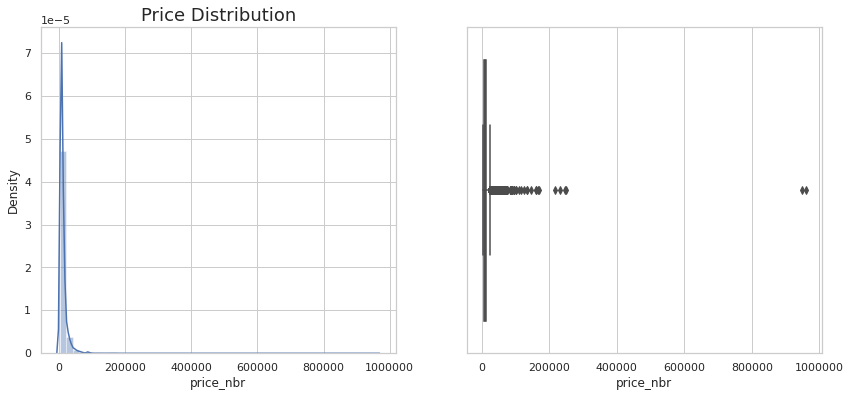

In [14]:
# Plotting the price to see the distribution and to check if there are any outliers.
fig = plt.figure(figsize=(14,6))

ax1 = fig.add_subplot(1,2,1)
sb.distplot(df['price_nbr'])
ax1.set_title('Price Distribution', fontsize=18)
ax1.ticklabel_format(style='plain', axis='x') # To repress scientific notation

ax2 = fig.add_subplot(1,2,2)
ax2 = sb.boxplot(df['price_nbr'])
ax2.ticklabel_format(style='plain', axis='x')

plt.show()

**Observation:** According to the dataset the minimum rental fee of an apartment is 3,000 TL and the max  is 960,000 TL which is way too higher than the mean. Obviously, there are some outliers in the dataset which can be confirmed by just checking the box plot and distreibution plot.

**Next Action:** We should remove the houses that have more than 20,000 TL monthly rental fee and check the distribution again.

In [15]:
# Removing houses which have more than 20,000 TL rental fee
df_1 = df[df['price_nbr'] < 20000]
df_1.describe(include='all') 

,title,area,numberOfRooms,price,town,district,price_nbr
count,7427,7427.000000,7427,7427,7427,6648,7427.000000
unique,7277,NaN,22,254,130,314,NaN
top,kiralık daire,NaN,2+1,7.000,Halkalı,Atakent Mah.,NaN
freq,10,NaN,2826,397,448,332,NaN
mean,NaN,109.138020,NaN,NaN,NaN,NaN,8714.313855
std,NaN,45.184362,NaN,NaN,NaN,NaN,3832.868505
min,NaN,1.225000,NaN,NaN,NaN,NaN,3000.000000
25%,NaN,78.000000,NaN,NaN,NaN,NaN,6000.000000
50%,NaN,100.000000,NaN,NaN,NaN,NaN,7750.000000
75%,NaN,135.000000,NaN,NaN,NaN,NaN,11000.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


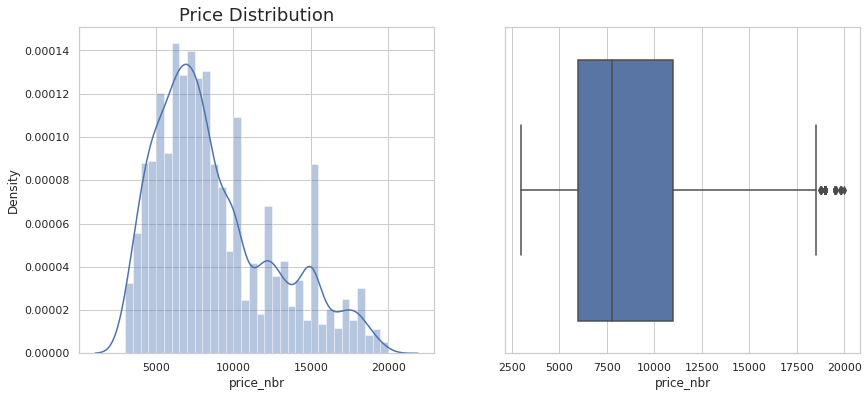

In [16]:
# Plotting the remaining prices to check the distribution
fig = plt.figure(figsize=(14,6))

ax1 = fig.add_subplot(1,2,1)
sb.distplot(df_1['price_nbr'])
ax1.set_title('Price Distribution', fontsize=18)
ax1.ticklabel_format(style='plain', axis='x') # To repress scientific notation

ax2 = fig.add_subplot(1,2,2)
ax2 = sb.boxplot(df_1['price_nbr'])
ax2.ticklabel_format(style='plain', axis='x')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


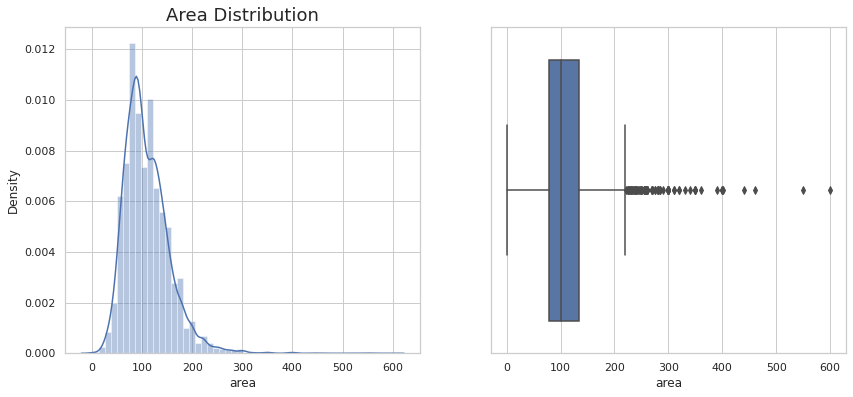

In [17]:
# Plotting area of the houses to see the dstribution and check if there are any outliers for those which has less than 20,000 rental fee.
fig = plt.figure(figsize=(14,6))

ax1 = fig.add_subplot(1,2,1)
sb.distplot(df_1['area'])
ax1.set_title('Area Distribution', fontsize=18)
ax1.ticklabel_format(style='plain', axis='x') # To repress scientific notation

ax2 = fig.add_subplot(1,2,2)
ax2 = sb.boxplot(df_1['area'])
ax2.ticklabel_format(style='plain', axis='x')

plt.show()

In [18]:
# Removing all houses which have more than 300 sqmt area.
df_2 = df_1[df_1['area'] < 300]
df_2.describe(include='all') 

,title,area,numberOfRooms,price,town,district,price_nbr
count,7394,7394.000000,7394,7394,7394,6616,7394.000000
unique,7244,NaN,21,253,130,314,NaN
top,kiralık daire,NaN,2+1,7.000,Halkalı,Atakent Mah.,NaN
freq,10,NaN,2822,397,448,332,NaN
mean,NaN,108.051809,NaN,NaN,NaN,NaN,8695.897890
std,NaN,41.974061,NaN,NaN,NaN,NaN,3820.280246
min,NaN,1.225000,NaN,NaN,NaN,NaN,3000.000000
25%,NaN,78.000000,NaN,NaN,NaN,NaN,6000.000000
50%,NaN,100.000000,NaN,NaN,NaN,NaN,7750.000000
75%,NaN,132.000000,NaN,NaN,NaN,NaN,11000.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


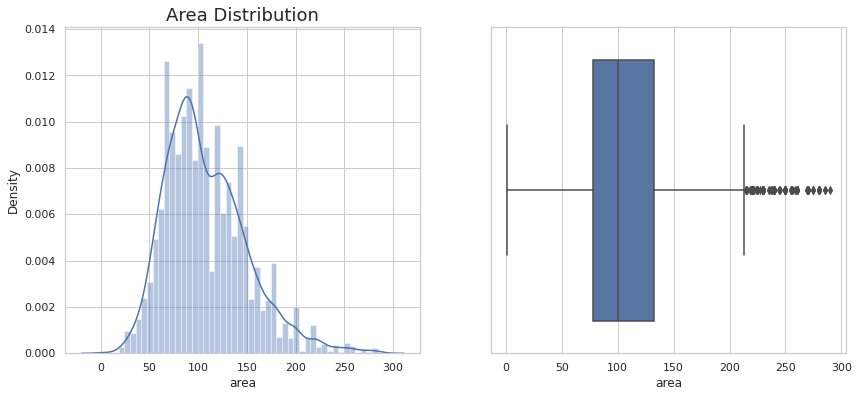

In [19]:
# Plotting the remaining houses wich less than 300 sqmt area.
fig = plt.figure(figsize=(14,6))

ax1 = fig.add_subplot(1,2,1)
sb.distplot(df_2['area'])
ax1.set_title('Area Distribution', fontsize=18)
ax1.ticklabel_format(style='plain', axis='x') # To repress scientific notation

ax2 = fig.add_subplot(1,2,2)
ax2 = sb.boxplot(df_2['area'])
ax2.ticklabel_format(style='plain', axis='x')

plt.show()

In [20]:
# Checking the uniwue number of rooms
df_2['numberOfRooms'].value_counts()

2+1      2822
3+1      2015
1+1      1644
1+0       320
4+1       213
3+2        94
4+2        63
2.5+1      45
1.5+1      44
5+1        39
3.5+1      32
2+2        22
5+2        18
4.5+1       9
2+0         4
6+2         2
3+0         2
6+1         2
5.5+1       2
4+3         1
4+0         1
Name: numberOfRooms, dtype: int64

In [21]:
# Checking the number of towns
df_2['town'].value_counts()

Halkalı           448
Kavaklı           342
Merkez            313
Gürpınar          277
Kayışdağı         205
Çakmak            203
Sefaköy           179
Mecidiyeköy       174
Ataşehir          152
Yakuplu           150
Esenyurt          142
Mimarsinan        142
Şerifali          140
Aydınevler        133
İdealtepe         130
Büyükçekmece      120
Bahçeşehir        118
Zümrütevler       111
Taşdelen          104
Fulya             104
Barbaros          100
Ataköy            100
Gülbahar           94
Yakacık            93
Küçükyalı          89
Çekmeköy           89
1                  85
Alemdağ            83
Güneşli            78
İkitelli           77
Aydınlı            77
Arnavutköy         75
Bağcılar           74
Örnek              72
Yeşilköy           70
Soğanlık           69
Esentepe           64
Duatepe            64
Rahmanlar          63
Florya             62
Taşoluk            62
Şişli              58
Yalı               58
İçerenköy          58
Cihangir           58
Kartaltepe

In [22]:
# It seems that there is a town with name 1. We remove it.
df_3 = df_2[df_2['town'] != '1']
df_3.describe(include='all')

,title,area,numberOfRooms,price,town,district,price_nbr
count,7309,7309.000000,7309,7309,7309,6531,7309.000000
unique,7162,NaN,21,251,129,313,NaN
top,kiralık daire,NaN,2+1,7.000,Halkalı,Atakent Mah.,NaN
freq,10,NaN,2780,396,448,332,NaN
mean,NaN,108.301556,NaN,NaN,NaN,NaN,8669.889041
std,NaN,42.012484,NaN,NaN,NaN,NaN,3817.182418
min,NaN,1.225000,NaN,NaN,NaN,NaN,3000.000000
25%,NaN,79.000000,NaN,NaN,NaN,NaN,6000.000000
50%,NaN,100.000000,NaN,NaN,NaN,NaN,7600.000000
75%,NaN,133.000000,NaN,NaN,NaN,NaN,10900.000000


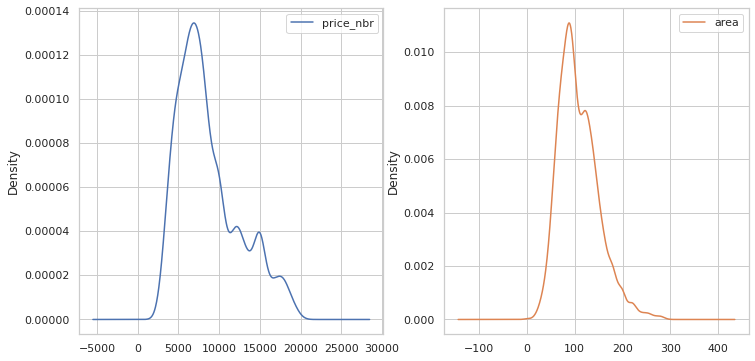

In [23]:
# Checking the distribution of area and price
df_3[['price_nbr', 'area']].plot(kind='density', subplots=True, layout=(1,2), sharex=False, figsize=(12,6))
plt.show()

In [24]:
# Splitting number of rooms into bed rooms and living room
df_3['nr_living_room'] = df_3['numberOfRooms'].str.split('+').str[0]
df_3['nr_bed_room'] = df_3['numberOfRooms'].str.split('+').str[1]
df_3.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,title,area,numberOfRooms,price,town,district,price_nbr,nr_living_room,nr_bed_room
count,7309,7309.000000,7309,7309,7309,6531,7309.000000,7309,7309
unique,7162,NaN,21,251,129,313,NaN,11,4
top,kiralık daire,NaN,2+1,7.000,Halkalı,Atakent Mah.,NaN,2,1
freq,10,NaN,2780,396,448,332,NaN,2806,6788
mean,NaN,108.301556,NaN,NaN,NaN,NaN,8669.889041,NaN,NaN
std,NaN,42.012484,NaN,NaN,NaN,NaN,3817.182418,NaN,NaN
min,NaN,1.225000,NaN,NaN,NaN,NaN,3000.000000,NaN,NaN
25%,NaN,79.000000,NaN,NaN,NaN,NaN,6000.000000,NaN,NaN
50%,NaN,100.000000,NaN,NaN,NaN,NaN,7600.000000,NaN,NaN
75%,NaN,133.000000,NaN,NaN,NaN,NaN,10900.000000,NaN,NaN


In [25]:
# Dropping district as it has a lot of NULL values
data = df_3.drop(['title', 'district', 'price'], axis='columns').reset_index(drop=True)
data.head()

,area,numberOfRooms,town,price_nbr,nr_living_room,nr_bed_room
0,160.0,3+1,Büyükada,10000,3,1
1,65.0,2+1,Büyükada,7250,2,1
2,60.0,2+1,Heybeliada,7000,2,1
3,130.0,3+1,Büyükada,14000,3,1
4,130.0,3+1,Büyükada,14000,3,1


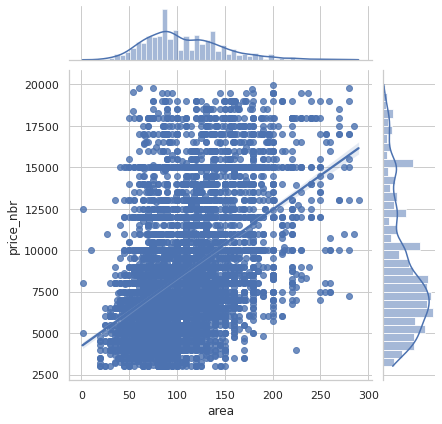

In [26]:
# Checking the relation between the area and price
sb.jointplot(x=data['area'], y=data['price_nbr'], kind='reg')

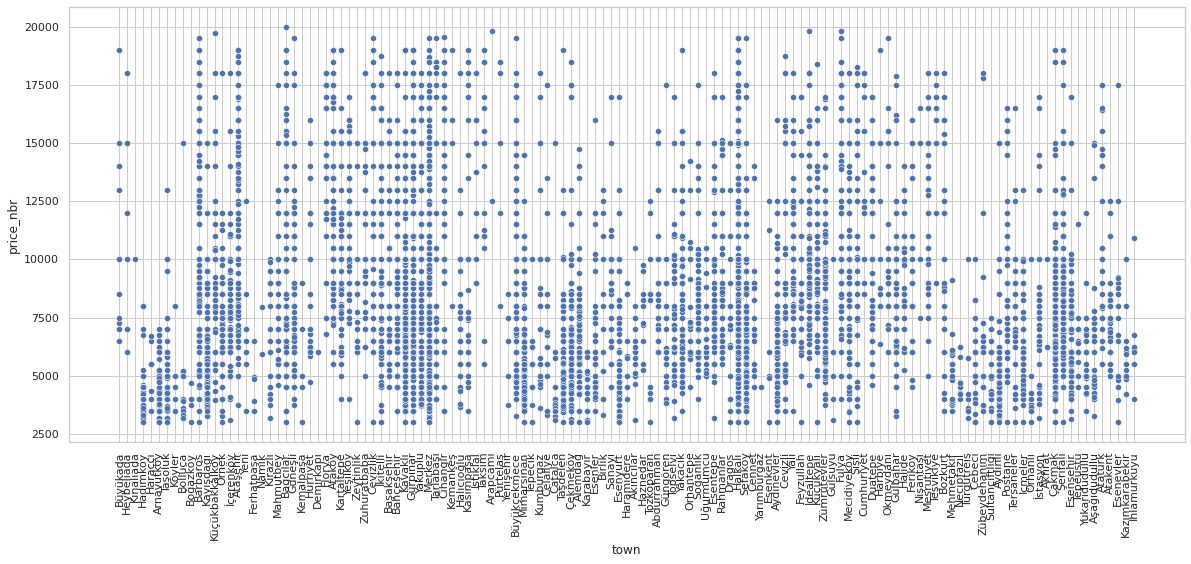

In [27]:
# Checking the price distribution for each town
fig = plt.subplots(figsize=(20,8))
sb.scatterplot(x=data['town'], y=data['price_nbr'])
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


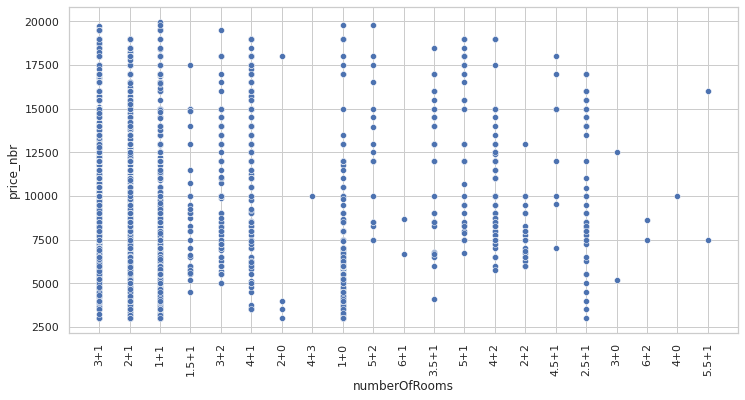

In [28]:
# Checking the price distribution on number of rooms
fig = plt.subplots(figsize=(12,6))
sb.scatterplot(data['numberOfRooms'], data['price_nbr'])
plt.xticks(rotation=90)
plt.show()

**Observations:** As you may seen on the above 3 plots, it's hard to detect a relationship between the dependent and the independent variables. 

We can notice that the most of the houses in this dataset are 2+1 and the second most is 3+1 and thrid one is 1+1. That's why it's possible to find houses with a price within the price range. Due to the lack of samples, it's hard to say the more room a house has, the more expensive the price. It's the same for area.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


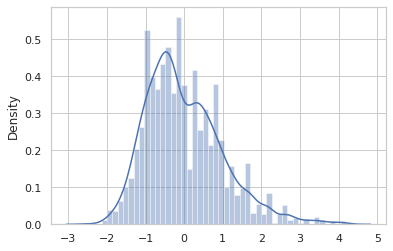

In [29]:
# Trying different scaling methods
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x = scale.fit_transform(data['area'].to_numpy().reshape(-1, 1))

sb.distplot(x)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


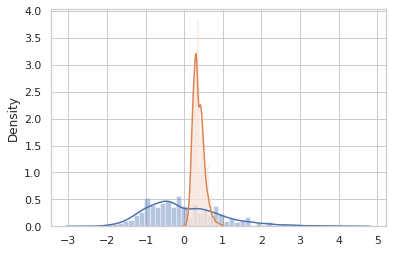

In [30]:
# Trying different scaling methods and comparing them
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
y = scale.fit_transform(data['area'].to_numpy().reshape(-1, 1))

sb.distplot(x)
sb.distplot(y)

In [31]:
# Removing numberOfRooms from dataset
data = data.drop(['numberOfRooms'], axis='columns')

In [32]:
# To make sure nr_living_room and nr_bed_room columns are objects
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7309 entries, 0 to 7308
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area            7309 non-null   float64
 1   town            7309 non-null   object 
 2   price_nbr       7309 non-null   int64  
 3   nr_living_room  7309 non-null   object 
 4   nr_bed_room     7309 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 285.6+ KB


In [33]:
# Creating dummies for the categorical variables
data_dum = pd.get_dummies(data, drop_first=True)

In [34]:
data_dum.head()

,area,price_nbr,town_Akfırat,town_Akıncılar,town_Alemdağ,town_Arapcami,town_Arnavutköy,town_Atakent,town_Ataköy,town_Atatürk,...,nr_living_room_3,nr_living_room_3.5,nr_living_room_4,nr_living_room_4.5,nr_living_room_5,nr_living_room_5.5,nr_living_room_6,nr_bed_room_1,nr_bed_room_2,nr_bed_room_3
0,160.0,10000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,65.0,7250,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,60.0,7000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,130.0,14000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,130.0,14000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


##Comparing Different Models

In [35]:
from sklearn.pipeline import Pipeline

from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.compose import TransformedTargetRegressor # For target scaling

In [36]:
# We'll create a function to select the model becasue we'll try it with different datasets
def model_selection(df):
  models = []
  names = []
  # Different metrics in an array
  scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']

  # We'll not take LinearRegression due to very poor performance because of non-linear relation between the target and the predictors.
  models.append(('LS', Lasso()))
  models.append(('ES', ElasticNet()))
  models.append(('DT', DecisionTreeRegressor()))
  models.append(('KN', KNeighborsRegressor()))
  models.append(('SV', SVR()))

  # Define features and the target 
  x = df.drop('price_nbr', axis='columns').values
  y = df['price_nbr'].values

  # Dataframe to store the results of different algorithms
  df_results = pd.DataFrame(columns=['Algorithm', 'Mean_R2', 'STD_R2', 'Mean_MAE', 'STD_MAE', 'Mean_MSE', 'STD_MSE'])
  results = []
  for name, run_model in models:
    names.append(name)
    estimator = []
    estimator.append(('s', StandardScaler()))
    estimator.append(('m', run_model))
    model = Pipeline(estimator)
    y_scaled = StandardScaler().fit_transform(y.reshape(-1, 1)) # Scale the target
    kfold = KFold(n_splits=10, random_state=101, shuffle=True)
    result = cross_validate(model, x, y_scaled, cv=kfold, scoring=scoring)
    
    # R-Squared
    mean_r2 = result['test_r2'].mean()
    std_r2 = result['test_r2'].std()
    # Mean Absolute Error
    mean_mae = result['test_neg_mean_absolute_error'].mean()
    std_mae = result['test_neg_mean_absolute_error'].std()
    # Mean Squared Error
    mean_mse = result['test_neg_mean_squared_error'].mean()
    std_mse = result['test_neg_mean_squared_error'].std()
    # Prepare the row for the results dataframe
    df_results_row = {'Algorithm': name, 'Mean_R2': mean_r2, 'STD_R2': std_r2,
              'Mean_MAE': mean_mae, 'STD_MAE': std_mae,
              'Mean_MSE': mean_mse, 'STD_MSE': std_mse}

    df_results = df_results.append(df_results_row, ignore_index = True)
    results.append(result['test_r2'])
    
  df_results = df_results.set_index('Algorithm')
  pd.set_option('display.float_format', lambda x: '%.3f' % x)
  print(df_results)

  fig, ax = plt.subplots(figsize=(8, 6))
  plt.boxplot(results)
  ax.set_xticklabels(names)
  plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

           Mean_R2  STD_R2  Mean_MAE  STD_MAE  Mean_MSE  STD_MSE
Algorithm                                                       
LS          -0.001   0.001    -0.806    0.015    -1.000    0.038
ES          -0.001   0.001    -0.806    0.015    -1.000    0.038
DT           0.386   0.064    -0.546    0.028    -0.614    0.069
KN           0.494   0.031    -0.517    0.020    -0.506    0.040
SV           0.488   0.036    -0.517    0.017    -0.511    0.037


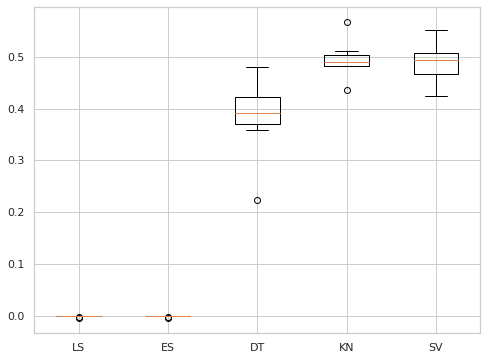

In [37]:
model_selection(data_dum)

**NOTE:** $𝑅^2$  compares the fit of the chosen model with that of a horizontal straight line (the null hypothesis). If the chosen model fits worse than a horizontal line, then $𝑅^2$ is negative. 

In [38]:
# When we create summy varilables from town it ends with more than 100 additional columns. 
# We'll try without town information to see the impact on the performance.

data_no_town = data.drop(['town'], axis='columns')
data_no_town.head()

,area,price_nbr,nr_living_room,nr_bed_room
0,160.000,10000,3,1
1,65.000,7250,2,1
2,60.000,7000,2,1
3,130.000,14000,3,1
4,130.000,14000,3,1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

           Mean_R2  STD_R2  Mean_MAE  STD_MAE  Mean_MSE  STD_MSE
Algorithm                                                       
LS          -0.001   0.001    -0.806    0.015    -1.000    0.038
ES          -0.001   0.001    -0.806    0.015    -1.000    0.038
DT           0.221   0.045    -0.675    0.019    -0.778    0.054
KN          -0.055   0.059    -0.773    0.030    -1.054    0.075
SV           0.196   0.031    -0.672    0.021    -0.804    0.047


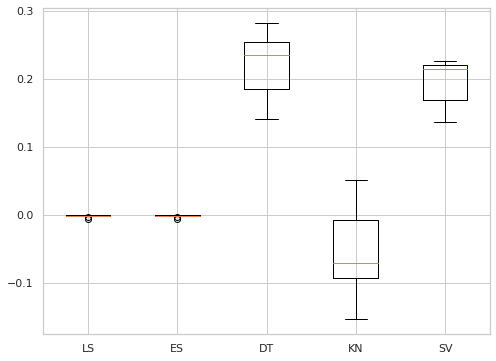

In [39]:
model_selection(data_no_town)

As can be seen on the above picture, the town has a positive impact on the models predictive performance. 

It's obivous that we don't have enough samples for each town. For instance we have only one sample for Kinaliada. Considering the wide variety of the rental fees it's not a good idea to put a treshold and combine those towns as "Others" which the sample size is lower than the treshold. However, we can remove those towns. We'll remove all towns which have less than 50 sample for now.

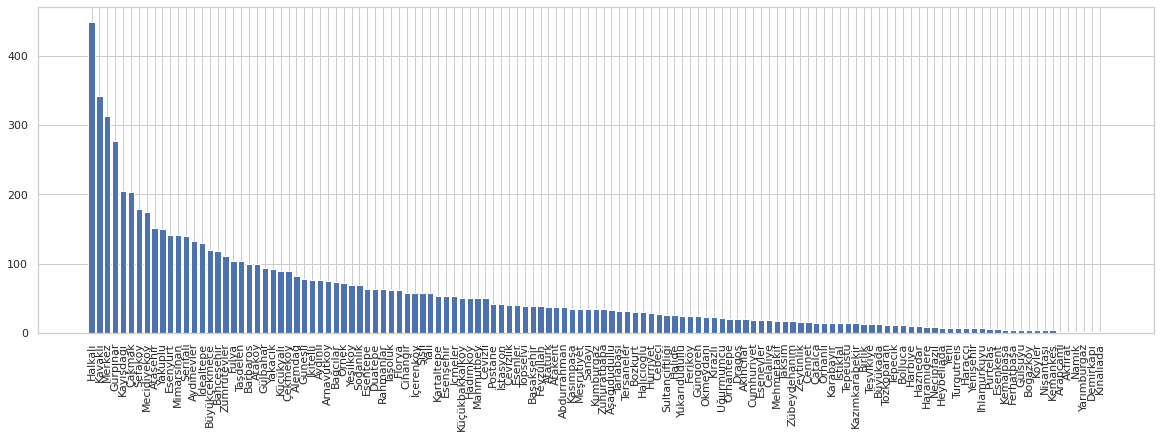

In [40]:
df_town = data['town'].value_counts().to_frame().reset_index()
df_town = df_town.rename(columns={'index': 'town', 'town': 'count'})
fig, ax = plt.subplots(figsize=(20,6))
plt.bar(df_town['town'], df_town['count'])
plt.xticks(rotation=90)
plt.show()

Number of towns: 51


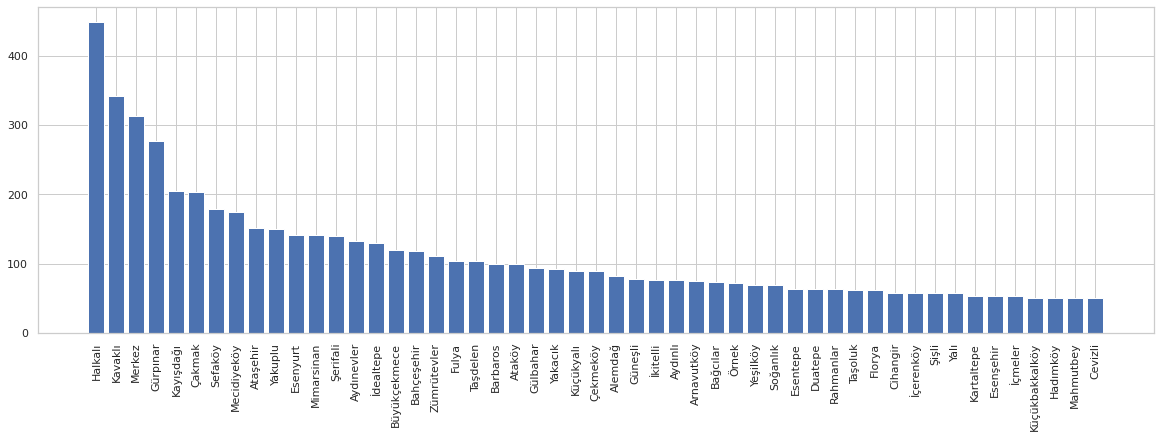

In [41]:
# Checking the number of towns that have more than 50 samples
df_town_ts = df_town[df_town['count'] >= 50]
print('Number of towns: %d' % len(df_town_ts))

fig, ax = plt.subplots(figsize=(20,6))
plt.bar(df_town_ts['town'], df_town_ts['count'])
plt.xticks(rotation=90)
plt.show()

In [42]:
# Finding the towns that have less than 50 samples
town_to_remove = df_town[df_town['count'] < 50]['town'].values
town_to_remove

array(['Postane', 'İstasyon', 'Cevizlik', 'Esenler', 'Topselvi',
       'Başakşehir', 'Feyzullah', 'Atatürk', 'Atakent', 'Abdurrahman',
       'Kasımpaşa', 'Meşrutiyet', 'Sanayi', 'Kumburgaz', 'Zuhuratbaba',
       'Aşağıdudullu', 'Tarlabaşı', 'Tersaneler', 'Bozkurt', 'Halıcıoğlu',
       'Hürriyet', 'Cebeci', 'Sultançiftliği', 'Halide', 'Yukarıdudullu',
       'Feriköy', 'Güngören', 'Okmeydanı', 'Kirazlı', 'Uğurmumcu',
       'Orhantepe', 'Dragos', 'Akıncılar', 'Cumhuriyet', 'Esenevler',
       'Celaliye', 'Mehmetakif', 'Taksim', 'Zübeydehanım', 'Zeytinlik',
       'Cennet', 'Çatalca', 'Orhanlı', 'Karabayır', 'İstiklal',
       'Tepeüstü', 'Kazımkarabekir', 'Birlik', 'Teşvikiye', 'Büyükada',
       'Tozkoparan', 'Tepecik', 'Bolluca', 'Harbiye', 'Haznedar',
       'Haramidere', 'Necipfazıl', 'Heybeliada', 'Yeni', 'Turgutreis',
       'Haraççı', 'Yenişehir', 'Ihlamurkuyu', 'Pürtelaş', 'Esenkent',
       'Kemalpaşa', 'Ferhatpaşa', 'Gülsuyu', 'Boğazköy', 'Köyler',
       'Nişantaşı', 'Kem

In [43]:
# Removing the towns which have less than 50 samples
df_dum_w_less_town = data[~ data['town'].isin(town_to_remove)] # Removing values from datafram using an array
df_dum_w_less_town = df_dum_w_less_town.reset_index(drop=True)
df_dum_w_less_town.head()

,area,town,price_nbr,nr_living_room,nr_bed_room
0,87.000,Hadımköy,4500,2,1
1,59.000,Hadımköy,3300,1,1
2,80.000,Arnavutköy,3500,2,1
3,85.000,Arnavutköy,3600,2,1
4,95.000,Arnavutköy,3650,2,1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

           Mean_R2  STD_R2  Mean_MAE  STD_MAE  Mean_MSE  STD_MSE
Algorithm                                                       
LS          -0.002   0.004    -0.808    0.023    -1.000    0.063
ES          -0.001   0.004    -0.807    0.023    -0.999    0.064
DT           0.435   0.075    -0.521    0.023    -0.561    0.060
KN           0.532   0.043    -0.492    0.023    -0.466    0.038
SV           0.530   0.032    -0.493    0.017    -0.468    0.027


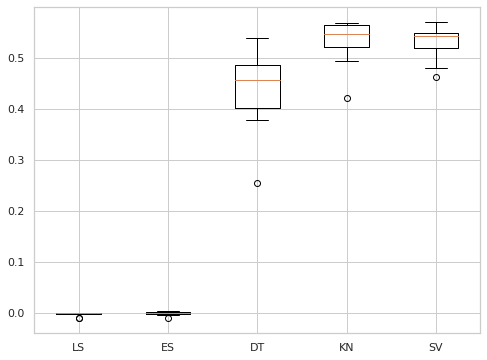

In [44]:
df_dum_w_less_town = pd.get_dummies(df_dum_w_less_town, drop_first=True)
model_selection(df_dum_w_less_town)

**Observation:** As can be seen on the above graph,removing the towns which have houses less then certain treshold improved the performance slightly.

Now, we can finetune the hyperparameters of KNN model to improve the performance.

##Hyperparameter Tuning for KNN Model

In [45]:
from sklearn.model_selection import GridSearchCV

# Define features and the target 
x = df_dum_w_less_town.drop('price_nbr', axis='columns').values
y = df_dum_w_less_town['price_nbr'].values

# List Hyperparameters that we want to tune.
n_neighbors = [1, 3, 5, 7, 10]
weights = ['uniform', 'disctance']
p = [1, 2]

# Convert them into dictionary
h_parameters = dict(n_neighbors=n_neighbors, p=p, weights=weights)

knn = KNeighborsRegressor()
x_scaled = StandardScaler().fit_transform(x)
y_scaled = StandardScaler().fit_transform(y.reshape(-1, 1)) # Scale the target

kfold = KFold(n_splits=10, shuffle=True, random_state=101)
grid = GridSearchCV(estimator=knn, param_grid=h_parameters, cv=kfold) # 

grid.fit(x_scaled, y_scaled)

# Print The value of best Hyperparameters
print('Best score:', grid.best_score_)
print('Best estimator', grid.best_estimator_)
print('Best hyperparameters', grid.best_params_)

Best score: 0.532529976725048
Best estimator KNeighborsRegressor(n_neighbors=7, p=1)
Best hyperparameters {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py", line 211, in fit
    self.weights = _check_weights(self.weights)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 83, in _check_weights
    "weights not recognized: should be 'uniform', "
ValueError: w

#Results

As you may see $R^2$ value didn't change by tuning the hyperparameters. We might be missing an important factor which effect the price of rental house  such as the age of the the building, the number of stories the building have which is an very importan factor as Istanbul is on the major fault line and the floor that the flat is on.